## Курсовая работа. Выполнил студент БФИ2203 Морозов М. В.

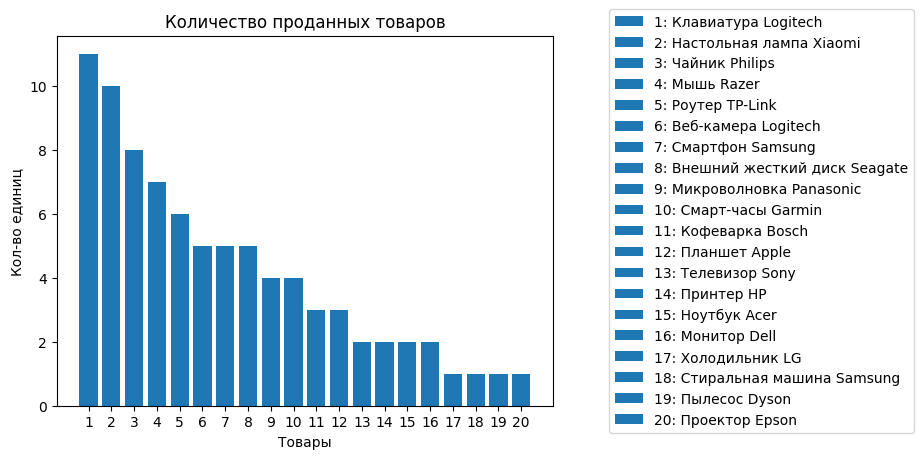

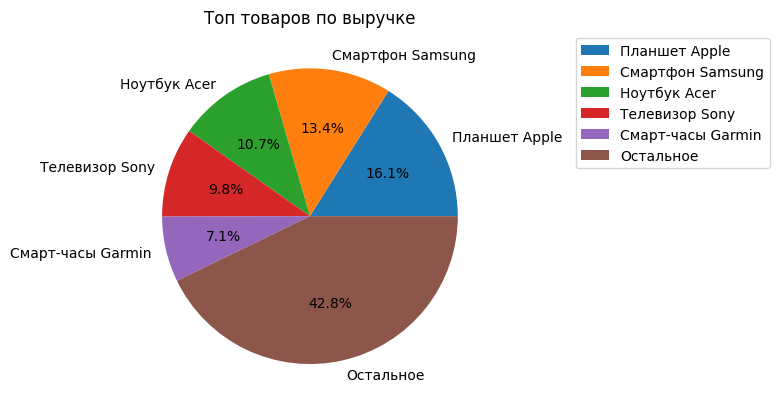

Наболее продаваемый товар - Клавиатура Logitech
Наболее прибыльный товар - Планшет Apple
Общая сумма выручки магазина: 1179000
----------
Отчёт по каждому товару (в алфавитном порядке):

Веб-камера Logitech:
	Количество проданных = 5, 
	Выручка с товара = 35000,
	Доля от общей выручки = 3.0 %
Внешний жесткий диск Seagate:
	Количество проданных = 5, 
	Выручка с товара = 40000,
	Доля от общей выручки = 3.4 %
Клавиатура Logitech:
	Количество проданных = 11, 
	Выручка с товара = 33000,
	Доля от общей выручки = 2.8 %
Кофеварка Bosch:
	Количество проданных = 3, 
	Выручка с товара = 21000,
	Доля от общей выручки = 1.8 %
Микроволновка Panasonic:
	Количество проданных = 4, 
	Выручка с товара = 32000,
	Доля от общей выручки = 2.7 %
Монитор Dell:
	Количество проданных = 2, 
	Выручка с товара = 50000,
	Доля от общей выручки = 4.2 %
Мышь Razer:
	Количество проданных = 7, 
	Выручка с товара = 35000,
	Доля от общей выручки = 3.0 %
Настольная лампа Xiaomi:
	Количество проданных = 10, 
	Выручка с товар

In [1]:
import csv
import matplotlib.pyplot as plt

# Реализация хэш-таблицы
class HashTable:
    # Класс ноды
    class Node:
        def __init__(self, key, value):
            self.key = key
            self.value = value
            self.next = None
    
    # Инициализация хэш-таблицы
    def __init__(self):
        self.capacity = 5
        self.size = 0
        self.buckets = [None] * self.capacity
  
    # Добавление элемента в хэш-таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        
        while node:
            if node.key == key: 
                node.value = value
                return
            node = node.next
 
        new_node = HashTable.Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self._rehash()
    
    # Поиск элемента в хэш-таблице
    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        return None
    
    # Удаление элемента в хэш-таблице
    def remove(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        prev = None
        while node:
            if node.key == key:
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next
  
    # Рехеширование хэш-таблцы
    def _rehash(self):
        tmp = self.buckets
        self.capacity *= 2
        self.size = 0
        self.buckets = [None] * self.capacity
        for node in tmp:
            while node:
                self.add(node.key, node.value)
                node = node.next

# Класс с различными методами сортировки               
class Sortings:
    
    # Сортировка выбором
    def selection_sort(arr, key=None, reverse=False):
        arr = list(arr)
        if not key:
            key = arr
        key = list(key)
            
        for i in range(len(key)):
            min_index = i
            for j in range(i+1, len(key)):
                if key[j] < key[min_index]:
                    min_index = j
            key[i], key[min_index] = key[min_index], key[i]
            arr[i], arr[min_index] = arr[min_index], arr[i]
        
        if reverse:
            return arr[::-1]
        
        return arr
    
    # Сортировка вставками
    def insertion_sort(arr, key=None, reverse=False):
        arr = list(arr)
        if not key:
            key = arr
        key = list(key)
        
        for i in range(1, len(key)):
            k = key[i]
            arr_k = arr[i]
            j = i - 1
            while j >= 0 and k < key[j]:
                key[j + 1] = key[j]
                arr[j + 1] = arr[j]
                j -= 1
            key[j + 1] = k
            arr[j + 1] = arr_k
        
        if reverse:
            return arr[::-1]
        
        return arr
    
    # Сортировка пузырьком
    def bubble_sort(arr, key=None, reverse=False):
        arr = list(arr)
        if not key:
            key = arr
        key = list(key)
        
        for i in range(len(key)):
            for j in range(len(key)-i-1):
                if key[j] > key[j+1]:
                    key[j], key[j+1] = key[j+1], key[j]
                    arr[j], arr[j+1] = arr[j+1], arr[j]
        
        if reverse:
            return arr[::-1]
        
        return arr       
        

# Функция нахождения общей выручки
def make_total_sum(data):
    total_sum = 0
    for row in data:
        total_sum += int(row.get("Общая стоимость"))
    return total_sum

# Функция нахождения наиболее продаваемого товара
def find_most_selling_product(data):
    max_selling = 0
    product = ""
    for row in data:
        if int(row.get("Количество продаж")) > max_selling:
            max_selling = int(row.get("Количество продаж"))
            product = row.get("Название товара")
    return product, max_selling

# Функция нахождения товара с наибольшей выручкой
def find_most_profitable_product(data):
    max_profit = 0
    product = ""
    for row in data:
        if int(row.get("Общая стоимость")) > max_profit:
            max_profit = int(row.get("Общая стоимость"))
            product = row.get("Название товара")
    return product, max_profit

# Функция создания столбчатой и круговой диаграмм
def make_diagrams(products, num_of_units, percentage):
    
    # Функция создания столбчатой диаграммы
    def bar_chart(products, num_of_units):
        elems = Sortings.selection_sort(zip(num_of_units, products), key=num_of_units, reverse=True)
        numbers = [str(i+1) for i in range(len(products))]
        
        bars_legend = list(map(lambda num: f"{num}: {elems[int(num)-1][1]}" , numbers))
        
        bars = plt.bar(numbers, list(map(lambda x: x[0], elems)))
        plt.legend(bars, bars_legend, loc='center left', bbox_to_anchor=(1.1, 0.5))
        
        plt.title('Количество проданных товаров')
        plt.xlabel('Товары')
        plt.ylabel('Кол-во единиц')
        plt.show()
    
    # Функция создания круговой диаграммы
    def pie_chart(products, percentage):
        elems = Sortings.insertion_sort(zip(percentage, products), key=percentage, reverse=True)
        elems[5] = (sum(map(lambda x: x[0], elems[6:])), "Остальное")
        elems = elems[:6]
        
        plt.pie(list(map(lambda x: x[0], elems)), labels=list(map(lambda x: x[1], elems)), autopct="%1.1f%%")
        plt.title("Топ товаров по выручке")
        plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1.0))
        plt.show()
    
    bar_chart(products, num_of_units)
    pie_chart(products, percentage)
   
# Функция создания отчёта
def make_report(data: list):
    data = Sortings.bubble_sort(data, key=map(lambda x: x.get("Название товара"), data))
    
    report = ""
    report += f"Наболее продаваемый товар - {find_most_selling_product(data)[0]}\n"
    report += f"Наболее прибыльный товар - {find_most_profitable_product(data)[0]}\n"
    
    total_sum = make_total_sum(data)
    
    report += f"Общая сумма выручки магазина: {total_sum}\n"
    report += "----------\n"
    report += "Отчёт по каждому товару (в алфавитном порядке):\n\n"
    
    products = []
    num_of_units = []
    percentage = []

    for row in data:
        products.append(row.get("Название товара"))
        num_of_units.append(int(row.get("Количество продаж")))
        percentage.append(int(row.get("Общая стоимость")))
        report += f"{row.get("Название товара")}:\n\tКоличество проданных = {row.get("Количество продаж")}, \n\tВыручка с товара = {row.get("Общая стоимость")},\n\tДоля от общей выручки = {round(int(row.get("Общая стоимость"))/total_sum*100, 1)} %\n"
    report += "----------\n"
    
    make_diagrams(products, num_of_units, percentage)
    
    return report
    
        
# Основной код программы          
data = []

with open('data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in spamreader:
        if "" in row:
            continue
        try:
            d = HashTable()
            d.add("Номер заказа", int(row[0]))
            d.add("Дата заказа", row[1])
            d.add("Название товара", row[2])
            d.add("Категория товара", row[3])
            d.add("Количество продаж", int(row[4]))
            d.add("Цена за единицу", int(row[5]))
            d.add("Общая стоимость", int(row[6]))
            
        except:
            continue
        
        if d.get("Номер заказа") < 0 or d.get("Количество продаж") < 0 or d.get("Цена за единицу") < 0 or d.get("Общая стоимость") < 0:
            continue
        
        data.append(d)
        
print(make_report(data))
